In [10]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv(r"career_v3.csv")

In [12]:
data.head()


,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [13]:
data.isnull().sum()


Student ID           0
Name                 0
Gender               0
Age                  0
GPA                  0
Major                0
Interested Domain    0
Projects             0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64

In [14]:
data.duplicated().sum()


np.int64(0)

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         10000 non-null  int64  
 1   Name               10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   GPA                10000 non-null  float64
 5   Major              10000 non-null  object 
 6   Interested Domain  10000 non-null  object 
 7   Projects           10000 non-null  object 
 8   Future Career      10000 non-null  object 
 9   Python             10000 non-null  object 
 10  SQL                10000 non-null  object 
 11  Java               10000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 937.6+ KB


In [16]:
data.describe()


,Student ID,Age,GPA
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,22.494100,3.252841
std,2886.89568,1.728544,0.430625
min,1.00000,20.000000,2.500000
25%,2500.75000,21.000000,2.880000
50%,5000.50000,22.000000,3.260000
75%,7500.25000,24.000000,3.620000
max,10000.00000,37.000000,4.000000


In [17]:
data.drop(columns=["Student ID", "Name"],axis=1,inplace= True)


In [18]:
data.groupby("Gender")["Major"].value_counts()


Gender  Major           
Female  Computer Science    1308
        Mechanical          1275
        EEE                 1218
        ECE                 1213
Male    Computer Science    1353
        ECE                 1233
        EEE                 1227
        Mechanical          1173
Name: count, dtype: int64

In [19]:
data.groupby("Gender")["GPA"].value_counts()


Gender  GPA 
Female  3.70    61
        3.16    56
        3.50    52
        3.60    52
        3.99    50
                ..
Male    3.10    19
        3.71    17
        2.67    15
        2.50    14
        4.00     9
Name: count, Length: 302, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

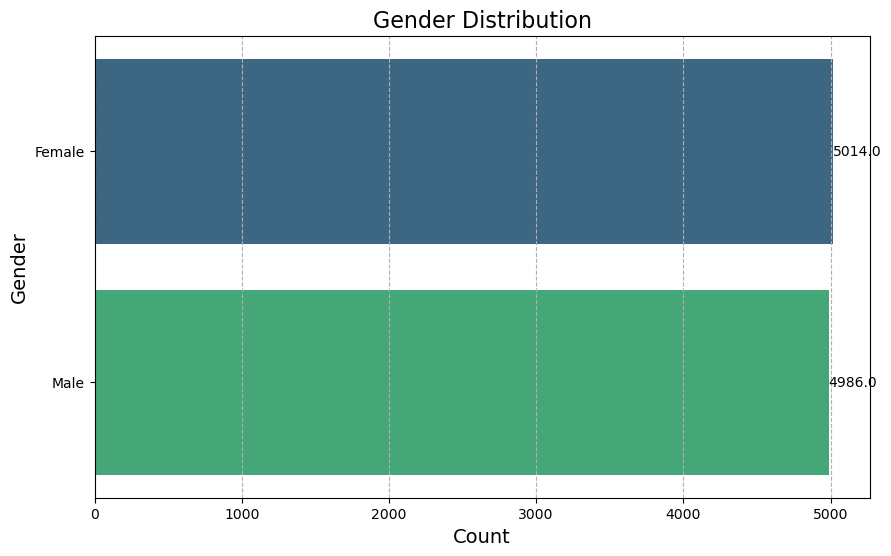

In [ ]:
plt.figure(figsize=(10, 6))
count_bar = sns.barplot(
    y=data["Gender"].value_counts().index,
    x=data["Gender"].value_counts().values,
    palette="viridis" 
)

for bar in count_bar.patches:
    x_value = bar.get_width()
    y_value = bar.get_y() + bar.get_height() / 2
    plt.text(x_value, y_value, f'{round(x_value, 2)}', va='center', ha='left')

plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Gender", fontsize=14)
plt.grid(axis='x', linestyle='--') 

plt.show()

In [ ]:
data.head()


,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


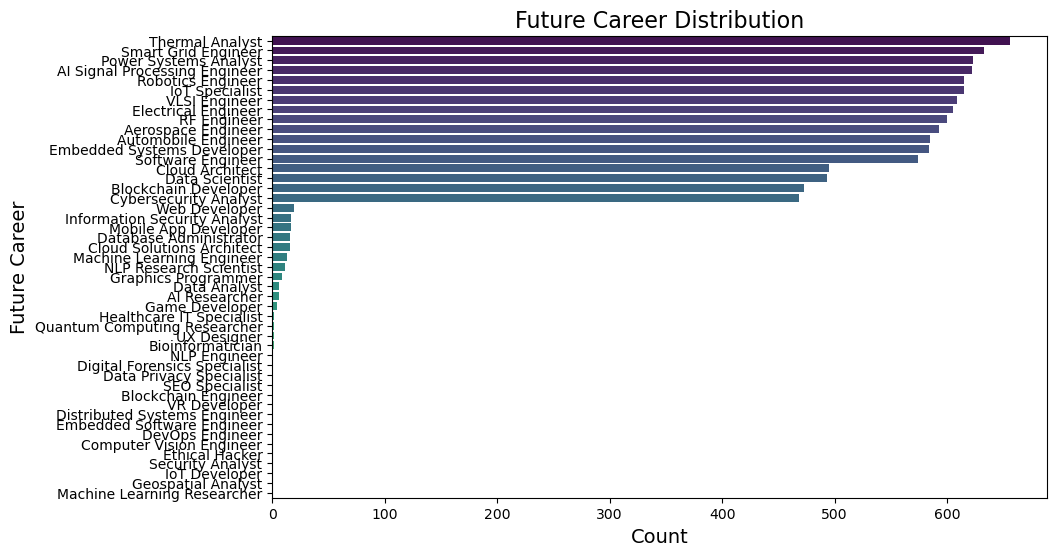

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=data["Future Career"].value_counts().sort_values(ascending=False).index, x=data["Future Career"].value_counts().sort_values(ascending=False).values, palette="viridis")

plt.title("Future Career Distribution", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Future Career", fontsize=14)
plt.show()


In [ ]:
data.head(2)

,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak


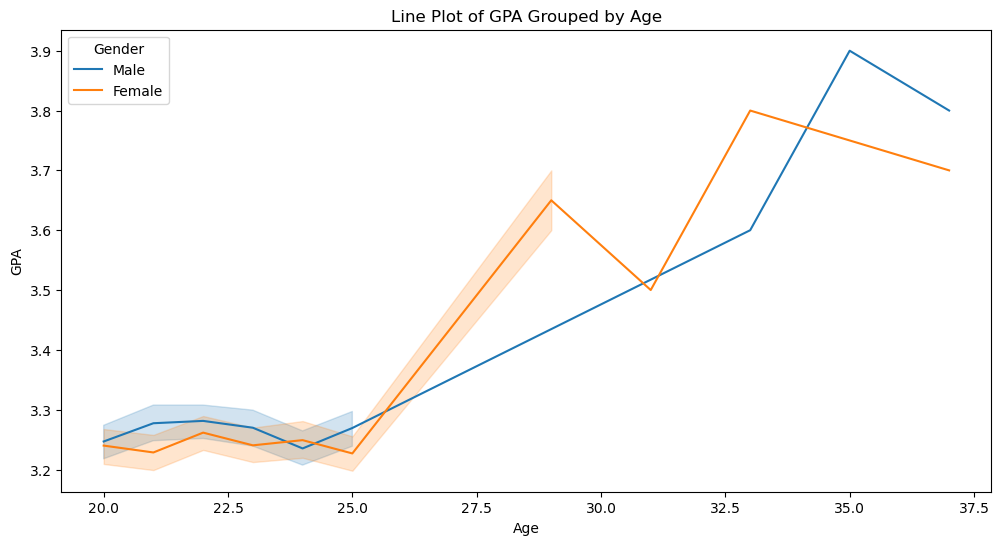

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(y=data["GPA"], x=data["Age"],hue=data["Gender"])
plt.title('Line Plot of GPA Grouped by Age')
plt.xlabel('Age')
plt.ylabel('GPA')
plt.show()


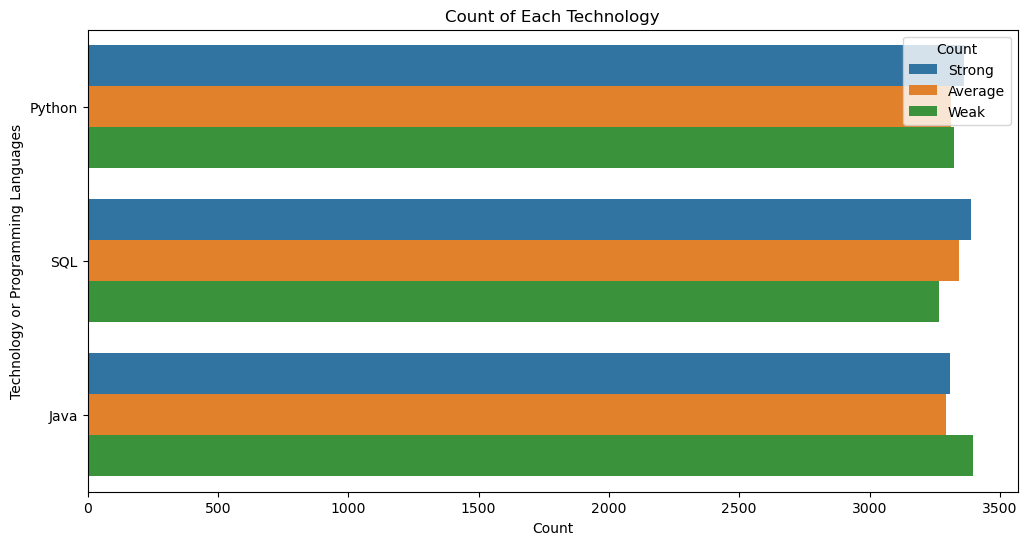

In [ ]:
long_data = pd.melt(data, value_vars=["Python", "SQL", "Java"], var_name="Technology", value_name="Count")

plt.figure(figsize=(12,6))
sns.countplot(data=long_data, y=long_data['Technology'],hue="Count")
plt.title('Count of Each Technology')
plt.xlabel('Count')
plt.ylabel('Technology or Programming Languages')
plt.show()

<Axes: >

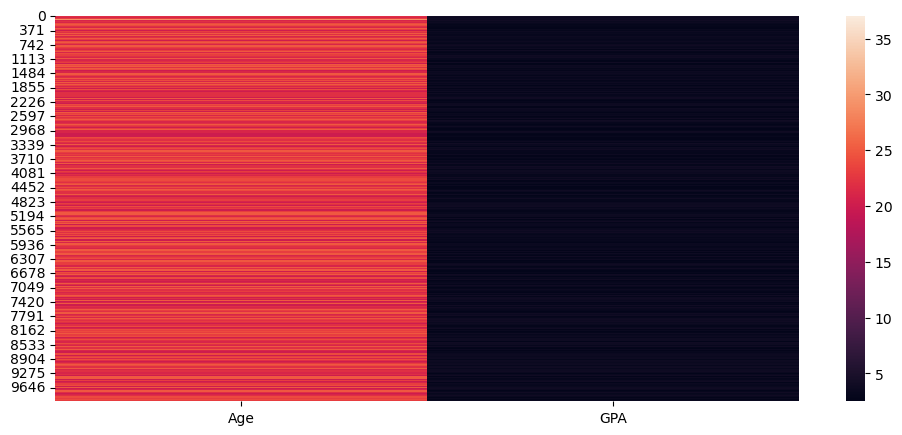

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']))


In [ ]:
!pip install optuna


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor


In [ ]:
!pip install xgboost lightgbm catboost


In [ ]:
for coll in data.columns:
    if data[coll].dtype == "object":
        data[coll] = LabelEncoder().fit_transform(data[coll])

In [ ]:
x = data.drop("Future Career",axis=1)
y = data["Future Career"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3) 

In [ ]:
import optuna
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def objective(trial):
    model_name = trial.suggest_categorical("model", [
        "LinearRegression", "Ridge", "Lasso", "RandomForest", "HistGradientBoosting"
    ])

    if model_name == "LinearRegression":
        model = LinearRegression()
    elif model_name == "Ridge":
        alpha = trial.suggest_float("ridge_alpha", 0.1, 100.0, log=True)
        model = Ridge(alpha=alpha)
    elif model_name == "Lasso":
        alpha = trial.suggest_float("lasso_alpha", 0.1, 100.0, log=True)
        model = Lasso(alpha=alpha)
    elif model_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 50, 200, step=50)
        max_depth = trial.suggest_categorical("rf_max_depth", [None, 10, 20])
        min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 10, step=3)
        min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 4)
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                      min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, 
                                      random_state=42)
    elif model_name == "HistGradientBoosting":
        max_iter = trial.suggest_int("hgb_max_iter", 100, 200, step=100)
        learning_rate = trial.suggest_float("hgb_lr", 0.01, 0.2, log=True)
        max_depth = trial.suggest_categorical("hgb_max_depth", [None, 10, 20])
        model = HistGradientBoostingRegressor(max_iter=max_iter, learning_rate=learning_rate, max_depth=max_depth)
    
    score = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    return np.mean(score)

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Retrieve best model and hyperparameters
best_model_name = study.best_trial.params['model']s t
print(f'Overall best Model Name: [ {best_model_name} ]')

# Train the best model on the full dataset
if best_model_name == "LinearRegression":
    best_model = LinearRegression()
elif best_model_name == "Ridge":
    best_model = Ridge(alpha=study.best_trial.params["ridge_alpha"])
elif best_model_name == "Lasso":
    best_model = Lasso(alpha=study.best_trial.params["lasso_alpha"])
elif best_model_name == "RandomForest":
    best_model = RandomForestRegressor(n_estimators=study.best_trial.params["rf_n_estimators"],
                                       max_depth=study.best_trial.params["rf_max_depth"],
                                       min_samples_split=study.best_trial.params["rf_min_samples_split"],
                                       min_samples_leaf=study.best_trial.params["rf_min_samples_leaf"],
                                       random_state=42)
elif best_model_name == "HistGradientBoosting":
    best_model = HistGradientBoostingRegressor(max_iter=study.best_trial.params["hgb_max_iter"],
                                               learning_rate=study.best_trial.params["hgb_lr"],
                                               max_depth=study.best_trial.params["hgb_max_depth"])

# Fit and evaluate the best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"R² score of {best_model_name}: {r2:.4f}")
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

[I 2025-03-03 20:06:35,036] A new study created in memory with name: no-name-b0b64792-4fc6-442d-b123-a00054c5d8fc
[I 2025-03-03 20:06:35,340] Trial 0 finished with value: -33.694578106251086 and parameters: {'model': 'HistGradientBoosting', 'hgb_max_iter': 100, 'hgb_lr': 0.0869827174614522, 'hgb_max_depth': 20}. Best is trial 0 with value: -33.694578106251086.
[I 2025-03-03 20:06:35,388] Trial 1 finished with value: -61.63232791731925 and parameters: {'model': 'LinearRegression'}. Best is trial 0 with value: -33.694578106251086.
[I 2025-03-03 20:06:35,756] Trial 2 finished with value: -28.76287825470434 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 50, 'rf_max_depth': 20, 'rf_min_samples_split': 5, 'rf_min_samples_leaf': 3}. Best is trial 2 with value: -28.76287825470434.
[I 2025-03-03 20:06:36,351] Trial 3 finished with value: -25.804707904539292 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 100, 'rf_max_depth': 10, 'rf_min_samples_split': 8, 'rf_min_samp

Overall best Model Name: [ RandomForest ]
R² score of RandomForest: 0.8162
MSE: 18.59
MAE: 1.84


In [ ]:
import pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("Best model saved as best_model.pkl")

Best model saved as best_model.pkl
